Traffic safety dataset.

This model utilizes two different datasets:
    1: US Department Of Transportation accident records
    2: US Census data to obtain population per city
    

The original dataset was 90,000 rows, so I trimmed it down to 20,000 rows for purposes of speed. 
From these 20,000 rows, 1000 random rows were selected.

The longitudinal and latitudinal coordinates were provided, but there was no city column, so I used the geopylibrary to convert these values to a city/AREA column.

A new category, "Group" was also created to simplify the SEVERITY column. This was divided into UPPER/MED/LOWER values.

Based on the month in which the accident occured, I then created a column for SEASON, which was not provided.

Matplotlib was then used to cast the individual cities, based on their severity, and season, into subplots.

PRACTICAL APPLICATION

Insurance companies, or trucking companies can use a model like this to forecast risks, and anticipate accidents in various areas based on certain values plugged into this model.

ANTICIPATED WEAKNESSES

This model does not include factors such as the type of vehicle involved, the condition/age of the driver. These would strengthen the accuracy of the model.

One could run this several times to gather data through a continuous stream through several randomization processes, and query a specific city in various regions. 

In [1]:
import pandas as pd
import numpy as np
import geocoder
import datetime
import matplotlib.pyplot as plt
import matplotlib as mp
from geopy.geocoders import Nominatim

DEFINE THE TWO DATAFRAMES

In [2]:
df = pd.read_csv('us_accidents_dec21.csv') #WORKING DATAFRAME

pop_df = pd.read_csv('city_pop.csv',sep=';') #DATA FOR CITY POPULATION

pop = pop_df[['City','Total Population']].copy() #RELEVANT COLUMNS
pop = pop.rename(columns={'Total Population':'Population'}) #Rename the column to drop spaces

FUNCTION FOR FETCHING POPULATION DATA

In [3]:
def get_pop(city):
    c = 0
    p = 0
    for i in pop.City:
        if (i == city): p = pop.Population[c]
        if (i == city): break
        c+=1
    return p

FUNCTION FOR GETTING LONGITUDE AND LATITUDE, returns CITY value from json format.

In [4]:
def geo_rev(x,y):
    
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.reverse([x,y])
    address = location.raw['address']
    
    return address.get('city')

FUNCTION FOR DISPLAYING DATA

In [5]:
def show_data(data,title, x_data, y_data, subtitle, nrow, ncol, sub_data):
    
    fig, axes = plt.subplots(nrow, ncol)
    
    plt.suptitle(title,y=1.4,x=1.2)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2.2, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
   
    
    #plot counter
    count=0
    for r in range(nrow):
        
        for c in range(ncol):

            data[count].plot(x=x_data, y=y_data,ax=axes[r,c],title=f'{subtitle} {sub_data[count]}')
            
            count+=1
            
    for ax in fig.axes: #Adjust labels
        mp.pyplot.sca(ax)
        plt.xticks(rotation=45)
    



FUNCTIONS FOR CONVERTING DATE VALUE TO MONTH VALUE, and stripping time value.

In [6]:
def get_month(y):
    y-=1
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
    
    return months[y]
    
           

EXTRACT THE DATA

In [7]:

pop.head()

,City,Population
0,Wichita,389955
1,Allen,120207
2,Danbury,84662
3,Nashville,654596
4,Stamford,128877


GET DIMENSIONS OF THE DATA - I truncated the file to 20,000 rows, rather than the original 96,000

In [8]:
df.shape

(20000, 48)

Show sample of data

In [9]:
df.head(5)

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2397454,A-2397455,2,2019-12-18 19:56:00,2019-12-18 20:49:46,34.136524,-117.565862,34.136524,-117.565862,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
1,1475923,A-1475924,2,2021-09-22 06:23:00,2021-09-22 06:33:30,30.352358,-81.668551,30.345329,-81.668322,0.486,...,False,False,False,False,False,False,Night,Night,Day,Day
2,2306229,A-2306230,2,2020-01-18 00:13:00,2020-01-18 03:26:10,44.982230,-93.243410,44.982230,-93.243410,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
3,209885,A-209886,2,2017-07-06 16:36:20,2017-07-06 22:36:20,25.900910,-80.324550,25.898410,-80.334220,0.625,...,False,False,False,False,False,False,Day,Day,Day,Day
4,1472368,A-1472369,2,2021-11-14 12:59:00,2021-11-14 14:34:30,38.081670,-112.679761,38.124790,-112.632191,3.945,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
# For sake of time, I am limiting the sample to 1000 of the original. 

df1 = df.sample(1000)


In [11]:
df1.head() #a new randomized data frame has now been created out of the original data

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
15316,82109,A-82110,4,2016-06-28 14:58:17,2016-06-28 20:58:17,37.773079,-81.058522,37.767406,-80.995458,3.467,...,False,False,False,False,False,False,Day,Day,Day,Day
14210,308358,A-308359,2,2021-06-23 13:24:30,2021-06-23 14:10:14,38.875748,-76.991070,38.870478,-76.988628,0.387,...,False,False,False,False,False,False,Day,Day,Day,Day
17587,507066,A-507067,2,2021-12-01 16:48:30,2021-12-01 17:22:00,40.145127,-75.393588,40.142242,-75.389800,0.282,...,False,False,False,False,False,False,Night,Day,Day,Day
2132,1373472,A-1373473,2,2021-09-15 18:30:39,2021-09-15 20:37:39,39.872592,-75.078409,39.875372,-75.049899,1.524,...,False,False,False,False,False,False,Day,Day,Day,Day
10978,524489,A-524490,2,2021-11-08 14:42:09,2021-11-08 16:59:15,35.155481,-80.851609,35.152882,-80.848504,0.251,...,False,False,False,False,False,False,Day,Day,Day,Day


THIS BLOCK FETCHES THE CITY BASED ON THE LATIDUDINAL AND LONGITUDINAL COORDINATES 
AND RETURNS A CITY POPULATION AS WELL

In [12]:
df1.insert(4, "Area", "")

In [13]:
c = 0 # Counter for indexing

for i,f in zip(df1.Start_Lat, df1.Start_Lng):    
    #df1['Area'].iloc[c] = geo_rev(i,f)
    df1.at[df1.index[c],'Area'] = geo_rev(i,f)
    
    c+=1
    

In [14]:
df1.insert(4, "Pop","")

In [15]:
df1 = df1[pd.notnull(df1['Area'])] #Drop city values where there are none.

In [16]:
c = 0
for i in df1.Area:
    #df1['Pop'].iloc[c] = get_pop(i)
    df1.at[df1.index[c],'Pop'] = get_pop(i)
    c+=1



In [17]:
df1.shape

(487, 50)

In [18]:
df1 = df1.drop(['Start_Lat','Start_Lng','End_Lat','End_Lng'],axis=1) #Drop superfluous columns

In [19]:
df1.head(5)

,Unnamed: 0,ID,Severity,Start_Time,Pop,Area,End_Time,Distance(mi),Description,Number,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
15316,82109,A-82110,4,2016-06-28 14:58:17,0,Beckley,2016-06-28 20:58:17,3.467,Closed between CR-9/Grandview Rd/129 and CR-27...,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
14210,308358,A-308359,2,2021-06-23 13:24:30,672228,Washington,2021-06-23 14:10:14,0.387,Slow traffic on I-695 S from 8th St (I-695/I-2...,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
17587,507066,A-507067,2,2021-12-01 16:48:30,0,Lower Providence Township,2021-12-01 17:22:00,0.282,Stationary traffic on PA-363 from Ridge Pike/S...,2699.0,...,False,False,False,False,False,False,Night,Day,Day,Day
10978,524489,A-524490,2,2021-11-08 14:42:09,827121,Charlotte,2021-11-08 16:59:15,0.251,Slow traffic from Marion Dehil Center Dr / Tre...,2630.0,...,False,False,False,False,False,False,Day,Day,Day,Day
5926,2330640,A-2330641,2,2020-02-06 20:31:00,111656,Inglewood,2020-02-06 22:03:58,0.000,At Florence Ave/La Cienega Blvd/Exit 47 - Acci...,NaN,...,False,False,False,False,True,False,Night,Night,Night,Night


Here I want to create 3 bins for levels of severity.

In [20]:
high = df1['Severity'].max()
med = df1['Severity'].mean()
min = df1['Severity'].min()

high = int(high)
print('Highest Severity: ',high)
med = int(med)
print('Median Severity: ',med)
min = int(min)
print('Lowest Severity: ',min)

Highest Severity:  4
Median Severity:  2
Lowest Severity:  1


In [21]:
df1.insert(2, "Group", "")

In [22]:

c = 0

#df1.Severity = df1.Severity.astype(int)

for i in df1['Severity']:
    i = int(i)
    # if (i == 4): df1.iloc[c]['Group'] = 'Upper' 
    # if (i == 1): df1.iloc[c]['Group'] = 'Lower'
    # if (i == 2): df1.iloc[c]['Group'] = 'Median'
    # if (i == 3): df1.iloc[c]['Group'] = 'Median'
    
    if (i == 4): df1.at[df1.index[c],'Group'] = 'Upper'
    if (i == 1): df1.at[df1.index[c],'Group'] = 'Lower'
    if (i == 2): df1.at[df1.index[c],'Group'] = 'Median'
    if (i == 3): df1.at[df1.index[c],'Group'] = 'Median'
    
    
    c+=1

   

Here, based on the date, I want to create a category for different seasons to simplify the risk matrix.
Change_Month() function will be used here. This value will be added to a new column "Month"

Then, a new column will be created for each season based on this value.

In [23]:
df1.insert(2,"Month","")

In [24]:
c = 0 # Counter for indexing

for i in df1['Start_Time']:
    i = str(i) # These two lines are for isolating only part of the date/time column
    i = i[5:7]
    i = int(i) # pass i to get_month as int, not string
    df1.at[df1.index[c],'Month'] = get_month(i) 
    c+=1


In [25]:
df1.head(5)

,Unnamed: 0,ID,Month,Group,Severity,Start_Time,Pop,Area,End_Time,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
15316,82109,A-82110,Jun,Upper,4,2016-06-28 14:58:17,0,Beckley,2016-06-28 20:58:17,3.467,...,False,False,False,False,False,False,Day,Day,Day,Day
14210,308358,A-308359,Jun,Median,2,2021-06-23 13:24:30,672228,Washington,2021-06-23 14:10:14,0.387,...,False,False,False,False,False,False,Day,Day,Day,Day
17587,507066,A-507067,Dec,Median,2,2021-12-01 16:48:30,0,Lower Providence Township,2021-12-01 17:22:00,0.282,...,False,False,False,False,False,False,Night,Day,Day,Day
10978,524489,A-524490,Nov,Median,2,2021-11-08 14:42:09,827121,Charlotte,2021-11-08 16:59:15,0.251,...,False,False,False,False,False,False,Day,Day,Day,Day
5926,2330640,A-2330641,Feb,Median,2,2020-02-06 20:31:00,111656,Inglewood,2020-02-06 22:03:58,0.000,...,False,False,False,False,True,False,Night,Night,Night,Night


This block creates a new column "Season" and changes the Months and reduces the months to the time of year.
To reduce the skew in this, one might also create Late/Early winter, since not all winter months are created equal.

In [26]:
df1.insert(2, "Season", "")

In [27]:
c = 0


#Define each season in a list
winter = ['Dec','Jan','Feb']
spring = ['Mar','Apr','May']
summer = ['Jun','Jul','Aug']
fall =   ['Sept','Oct','Nov']

for i in df1.Month:
     
    for j in winter:
        if (i == j): df1.at[df1.index[c],'Season'] = "Winter"
        
    for j in spring:
        if (i == j): df1.at[df1.index[c],'Season'] = "Spring"
        
    for j in summer:
        if (i == j): df1.at[df1.index[c],'Season'] = "Summer"
        
    
    for j in fall:
        if (i == j): df1.at[df1.index[c],'Season'] = "Fall"
        
    
    c+=1

In [28]:
df1.sample(10)

,Unnamed: 0,ID,Season,Month,Group,Severity,Start_Time,Pop,Area,End_Time,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
16807,32595,A-32596,Winter,Dec,Upper,4,2016-12-03 20:57:45,2720556,Chicago,2016-12-04 02:57:45,...,False,False,False,False,False,False,Night,Night,Night,Night
728,2808992,A-2808993,Summer,Jun,Upper,4,2019-06-20 20:38:11,0,Montgomery Township,2019-06-20 21:07:12,...,False,False,False,False,False,False,Night,Day,Day,Day
16358,153006,A-153007,Spring,Mar,Median,2,2017-03-01 06:25:09,0,Plymouth Township,2017-03-01 12:25:09,...,False,False,False,False,True,False,Night,Day,Day,Day
7344,700518,A-700519,Winter,Dec,Median,2,2021-12-23 23:05:00.000000,153252,Pomona,2021-12-24 01:11:43.000000,...,False,False,False,False,False,False,Night,Night,Night,Night
10854,1597777,A-1597778,Winter,Jan,Median,2,2021-01-13 08:57:00,270917,Orlando,2021-01-13 11:12:08,...,False,False,False,False,True,False,Day,Day,Day,Day
1538,823728,A-823729,Spring,Apr,Median,2,2021-04-01 17:37:29,0,Nitro,2021-04-01 20:45:00,...,False,False,False,False,False,False,Day,Day,Day,Day
654,2422991,A-2422992,Fall,Oct,Median,2,2019-10-18 02:02:00,77056,Baldwin Park,2019-10-18 04:15:25,...,False,False,False,False,False,False,Night,Night,Night,Night
14976,2660224,A-2660225,Spring,May,Median,2,2018-05-30 09:26:46,2298628,Houston,2018-05-30 15:26:46,...,False,False,False,False,False,False,Day,Day,Day,Day
18078,239298,A-239299,Winter,Dec,Median,2,2021-12-20 13:01:02.000000000,270917,Orlando,2021-12-20 15:07:19.000000000,...,False,False,False,False,False,False,Day,Day,Day,Day
17289,169114,A-169115,Spring,Mar,Median,2,2017-03-24 13:33:14,68906,Walnut Creek,2017-03-24 19:33:14,...,False,False,False,False,False,False,Day,Day,Day,Day


In [29]:
df1.loc[df1['Group'] == "Median"].count()

Unnamed: 0               465
ID                       465
Season                   465
Month                    465
Group                    465
Severity                 465
Start_Time               465
Pop                      465
Area                     465
End_Time                 465
Distance(mi)             465
Description              465
Number                   138
Street                   465
Side                     465
City                     465
County                   465
State                    465
Zipcode                  465
Country                  465
Timezone                 465
Airport_Code             465
Weather_Timestamp        462
Temperature(F)           457
Wind_Chill(F)            388
Humidity(%)              456
Pressure(in)             462
Visibility(mi)           458
Wind_Direction           456
Wind_Speed(mph)          442
Precipitation(in)        368
Weather_Condition        459
Amenity                  465
Bump                     465
Crossing      

In [34]:
df2 = df1[['Area', 'Severity','Season','Pop']].copy()

cities = ['Los Angeles','Chicago','New York','Tulsa'] #This list can be expanded, or changed as needed

df2 = df2.loc[df2['Area'].isin(cities)].copy() #only get rows where cities obtains

df2[df2.duplicated(keep=False)]  #drop duplicates, if any.


,Area,Severity,Season,Pop
1699,Los Angeles,2,Summer,3971896
14974,New York,3,Spring,8550405
13879,Los Angeles,3,Summer,3971896
15501,Los Angeles,2,Spring,3971896
308,Los Angeles,2,Summer,3971896
4024,Los Angeles,2,Summer,3971896
10647,Los Angeles,2,Fall,3971896
14489,Los Angeles,2,Fall,3971896
17253,Los Angeles,3,Summer,3971896
10209,Los Angeles,2,Summer,3971896


In [31]:
df2.head()

,Area,Severity,Season
1699,Los Angeles,2,Summer
16807,Chicago,4,Winter
14974,New York,3,Spring
14368,New York,2,Summer
13045,Chicago,3,Fall


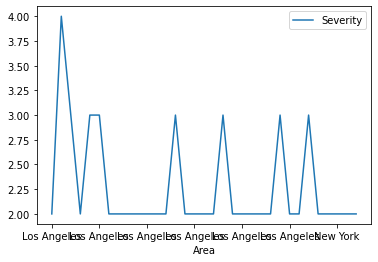

In [32]:
axes = plt.gca()
df2.plot(x='Area', y='Severity',ax=axes);

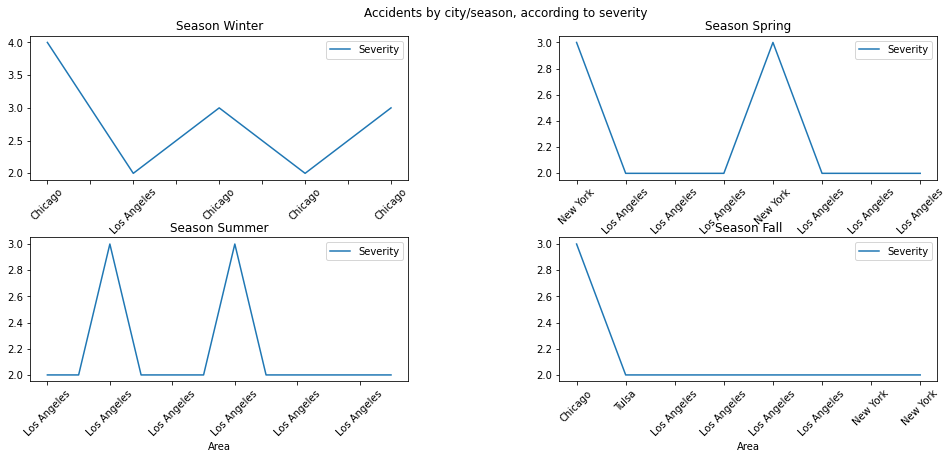

In [33]:
seasons = ['Winter','Spring','Summer','Fall']


df3 = df2[['Severity','Season','Area']].copy()
df3 = df3.loc[df2['Season'] == 'Winter']

df4 = df2[['Severity','Season','Area']].copy()
df4 = df4.loc[df2['Season'] == 'Spring']

df5 = df2[['Severity','Season','Area']].copy()
df5 = df5.loc[df2['Season'] == 'Summer']
           
df6 = df2[['Severity','Season','Area']].copy()
df6 = df6.loc[df2['Season'] == 'Fall']           


#df.loc[df['col1'] == value]

# make a list of all dataframes 
df_list = [df3, df4, df5, df6]


show_data(df_list,
          'Accidents by city/season, according to severity'
          ,'Area', 'Severity', 
          'Season', 2, 2, seasons)

#where (df1 ("NUMBER"] == df2[ "NUMVALUE"))

With the provided population data, some statistics can be performed.

The weakness here is that the sample size is too small for each city to obtain a meaningful per capita accident rate. However, if the sampling were expanded, it could become more accurate.

## 

In [64]:
print('ACCIDENTS PER CAPITA')
for i in cities:
    instances = df2['Area'].loc[df2.Area == i].count()
    pop1 = df2['Pop'].loc[df2.Area == i]
    percap = pop1 // instances
    
    
    print(i,': ',instances)
  

ACCIDENTS PER CAPITA
Los Angeles :  21
Chicago :  5
New York :  5
Tulsa :  2
